# v3

sequental, greyscale, sparse category

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


from tensorflow.keras import datasets, layers, models
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
# resim verisini tek kanala dusur ve normalize et

rgb_weights = [0.2989, 0.5870, 0.1140]

trainX = np.dot(trainX[...,:3], rgb_weights)
testX = np.dot(testX[...,:3], rgb_weights)

trainX = trainX / 255.0
testX = testX / 255.0

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(50000, 32, 32)
(50000, 1)
(10000, 32, 32)
(10000, 1)


In [4]:
model = models.Sequential()
# model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.Input(shape=(32, 32)))
model.add(layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 558,282
Trainable params: 558,282
Non-trainable params: 0
_________________________________________________________________


### optimizer
optimizer nedir
biz hangi optimizier i neden kullandik

### loss

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.




In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(trainX, trainY, epochs=20, 
                    validation_data=(testX, testY), verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 124us/sample - loss: 2.0819 - acc: 0.2360 - val_loss: 1.9479 - val_acc: 0.3016
Epoch 2/20
50000/50000 [==============================] - 6s 122us/sample - loss: 1.9096 - acc: 0.3107 - val_loss: 1.8837 - val_acc: 0.3182
Epoch 3/20
50000/50000 [==============================] - 6s 124us/sample - loss: 1.8353 - acc: 0.3440 - val_loss: 1.8415 - val_acc: 0.3338
Epoch 4/20
50000/50000 [==============================] - 6s 124us/sample - loss: 1.7929 - acc: 0.3622 - val_loss: 1.7711 - val_acc: 0.3690
Epoch 5/20
50000/50000 [==============================] - 6s 120us/sample - loss: 1.7654 - acc: 0.3716 - val_loss: 1.7515 - val_acc: 0.3820
Epoch 6/20
50000/50000 [==============================] - 6s 120us/sample - loss: 1.7356 - acc: 0.3836 - val_loss: 1.7620 - val_acc: 0.3760
Epoch 7/20
50000/50000 [==============================] - 6s 120us/sample - loss: 1.7146 - acc: 0.3916 - val_l

In [7]:
test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

10000/10000 - 0s - loss: 1.6704 - acc: 0.4153


acc: 0.41530001163482666


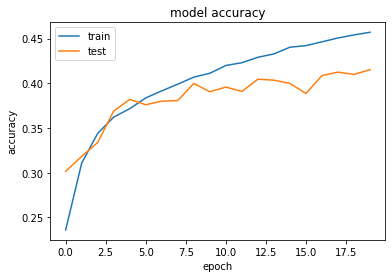

acc: 0.41530001163482666


In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
# plt.savefig('benchmarks/epoch_.png', dpi=300, bbox_inches='tight')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("acc: {}".format(test_acc))

# Çıkarılan Sonuçlar

Model aynı kalmak şartıya epoch sayısı arttırılsada bir esikten sonra modelin basarımı artmıyor.